In [30]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import DataFrame


# Read data

In [ ]:
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).squeeze()
print(series.head())
series.plot()
pyplot.show()

# Plots

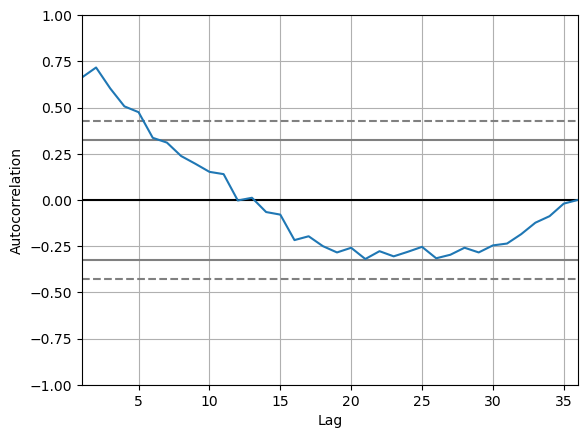

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

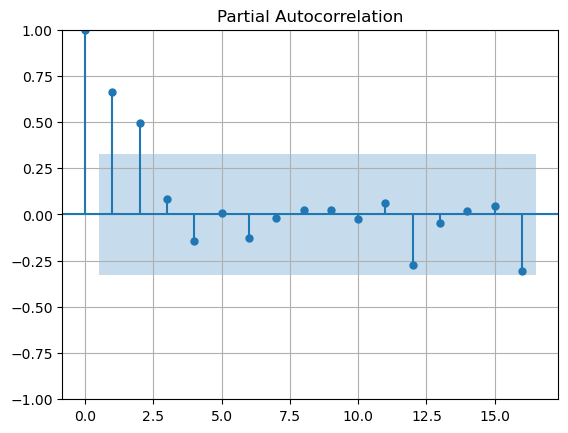

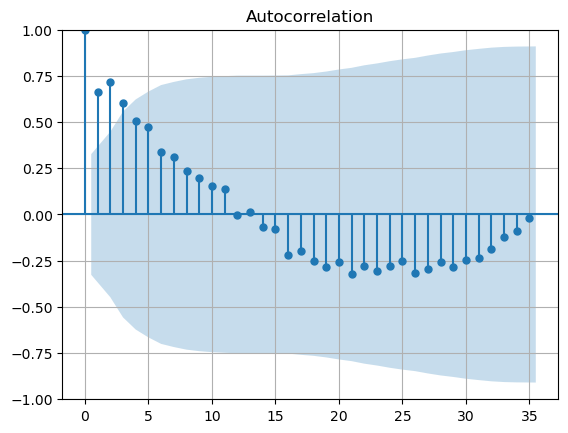

In [25]:
plot_pacf(series, method='ywm')
pyplot.grid()

plot_acf(series, lags=35)
pyplot.grid()

pyplot.show()

# Create a model

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

/Users/sebastian/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sebastian/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sebastian/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sat, 15 Apr 2023   AIC                            408.969
Time:                        16:45:46   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

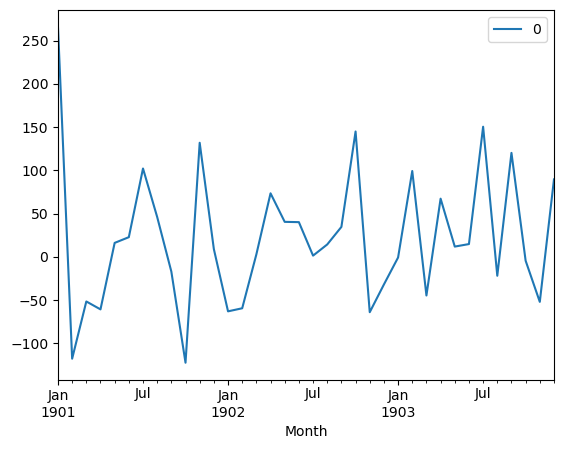

In [31]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

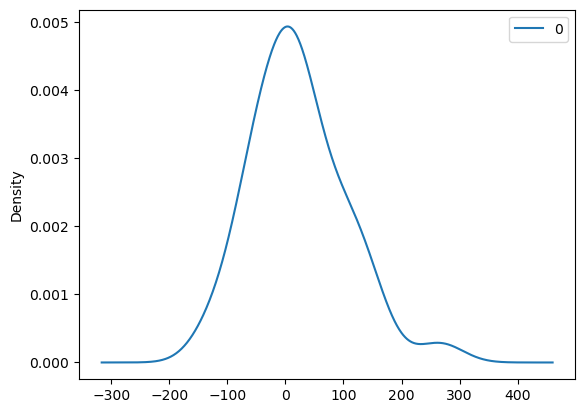

In [34]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [41]:
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


# Create a model and make predictions

In [42]:
series.index = series.index.to_period('M')

In [48]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [59]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    # print('output')
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

[535.92375263]
predicted=535.923753, expected=342.300000
[630.56003065]
predicted=630.560031, expected=339.700000
[392.07119733]
predicted=392.071197, expected=440.400000
[327.43979053]
predicted=327.439791, expected=315.900000
[406.97539042]
predicted=406.975390, expected=439.300000
[391.45934471]
predicted=391.459345, expected=401.300000
[383.78125729]
predicted=383.781257, expected=437.400000
[437.54866885]
predicted=437.548669, expected=575.500000
[455.38235376]
predicted=455.382354, expected=407.600000
[512.33648005]
predicted=512.336480, expected=682.000000
[518.87110397]
predicted=518.871104, expected=475.300000
[557.37217744]
predicted=557.372177, expected=581.300000
[583.33890561]
predicted=583.338906, expected=646.900000


In [63]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 119.353


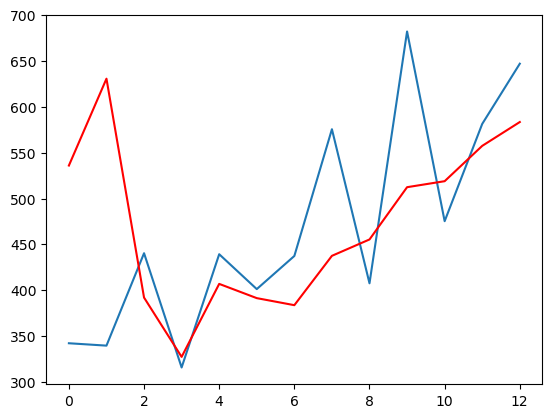

In [64]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()